In [ ]:
import pandas as pd
bankruptcy = pd.read_csv(r"C:/Users/Jules/Desktop/McGill/INSY 695/bankruptcy.csv")

In [53]:
import pandas as pd
bankruptcy = pd.read_csv("data.csv")

In [3]:
bankruptcy

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [23]:
bankruptcy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [11]:
bankruptcy.isnull().sum().sort_values(ascending = False)
# It means no NaN values in the dataframe.

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 Total expense/Assets                                       0
 Total income/Total expense                                 0
 Retained Earnings to Total Assets                          0
                                                           ..
 Total Asset Growth Rate                                    0
 Continuous Net Profit Growth Rate                          0
 Regular Net Profit Growth Rate                             0
 After-tax Net Profit Growth Rate                           0
 Equity to Liability                                        0
Length: 96, dtype: int64

In [18]:
bankruptcy[' Net Income Flag'].nunique()
# Column ` Net Income Flag` only has one value, so we can drop it.

1

In [54]:
bankruptcy_drop = bankruptcy.drop([' Net Income Flag'], axis=1)
#need to drop all other useless/correlated columns too

In [ ]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(df, hue='Churn', height=2);
#this hoe takes forever to run so I just killed it. This is just to vizualize data

In [55]:
#Variable creation
x_raw = bankruptcy_drop.drop(['Bankrupt?'], axis=1)
y = bankruptcy['Bankrupt?']
x_col = [x_raw.columns]

In [21]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_raw)

In [34]:
x_pd = pd.DataFrame(x_scaled)
x_pd.columns = x_col
x_pd.apply(pd.to_numeric)

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-0.034272,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.034272,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086567,...,-0.034272,-0.820510,-0.049491,-0.005984,-0.383699,-0.249820,0.679247,-0.062961,-0.125015,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011078,...,-0.034272,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540707,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.034272,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,-0.189395,-0.291959,-0.168181,-0.206277,-0.204970,0.018215,0.017035,0.018197,-0.010092,0.016277,...,-0.034272,-0.194231,-0.049491,-0.024011,-0.206217,-0.002968,-0.052524,-0.030437,0.063215,-0.353693
6815,-0.494676,-0.310237,-0.477627,-0.569328,-0.568828,0.018223,0.017455,0.017919,-0.009248,0.016145,...,-0.034272,-0.198659,-0.049491,0.001317,-0.569333,-0.006633,-0.154404,-0.033992,0.049970,-0.185856
6816,-0.534845,-0.379194,-0.534996,0.147411,0.135029,0.017628,0.016412,0.017153,-0.009919,0.013012,...,-0.034272,-0.247517,-0.049491,0.019653,0.147305,-0.018166,-0.316446,-0.047870,-0.015101,1.001206
6817,0.017875,0.019594,0.007403,-0.005811,-0.004720,0.024494,0.024099,0.023223,-0.011175,0.022233,...,-0.034272,0.100366,-0.049491,0.003493,-0.005931,0.046934,-0.194852,-0.045898,-0.004270,-0.071364


In [26]:
import numpy as np
corr_matrix = np.corrcoef(x_pd).round(decimals=2)
print(corr_matrix)

[[ 1.    0.2   0.27 ... -0.32 -0.18 -0.19]
 [ 0.2   1.    0.08 ... -0.05 -0.06 -0.06]
 [ 0.27  0.08  1.   ... -0.03 -0.08 -0.04]
 ...
 [-0.32 -0.05 -0.03 ...  1.    0.18  0.29]
 [-0.18 -0.06 -0.08 ...  0.18  1.   -0.02]
 [-0.19 -0.06 -0.04 ...  0.29 -0.02  1.  ]]


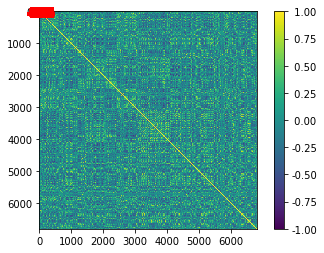

In [45]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
#ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
#ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('x', 'y', 'z'))
#ax.set_ylim(2.5, -0.5)
for i in range(len(x_pd.columns)):
    for j in range(len(x_pd.columns)):
        ax.text(j, i, corr_matrix[i, j], ha='center', va='center',
                color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()

In [35]:
#Anomaly Detection
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators=100,contamination=0.01)
pred = iforest.fit_predict(x_pd)
score = iforest.decision_function(x_pd)
from numpy import where
anom_index = where(pred==-1)
values = x_pd.iloc[anom_index]
values
for i in values.index:
    x_pd = x_pd.drop(i)
    y = y.drop(i)

In [36]:
x_pd.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-2.217909,-2.045798,-2.400361,-0.383334,-0.382638,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,...,-0.034272,-2.254317,-0.049491,-0.084274,-0.383465,-0.861611,0.680171,-0.060031,-0.098978,-0.622067
1,-0.673828,-0.311068,-0.598450,0.135068,0.136307,0.014671,0.014799,0.015966,-0.005957,0.009823,...,-0.034272,-0.309033,-0.049491,-0.021388,0.135253,-0.029804,0.240685,15.129816,0.364559,-0.535573
2,-1.303672,-0.908420,-1.319910,-0.383759,-0.388177,0.007858,-0.061111,-0.051183,-0.142238,-0.086567,...,-0.034272,-0.820510,-0.049491,-0.005984,-0.383699,-0.249820,0.679247,-0.062961,-0.125015,-0.621960
3,-1.735886,-1.636209,-1.556340,-1.441418,-1.441832,-0.004257,-0.017313,-0.008676,-0.024491,-0.011078,...,-0.034272,-1.691222,-0.049491,-0.080226,-1.441526,-0.392864,0.093765,-0.053903,-0.052562,-0.471826
4,-0.661778,-0.307745,-0.508050,-0.541238,-0.540707,0.016758,0.013703,0.016186,-0.013254,0.013300,...,-0.034272,-0.316008,-0.049491,-0.032052,-0.541255,-0.029564,-0.128014,-0.178037,0.776395,-0.241715


In [37]:
x_pd.shape

(6750, 94)

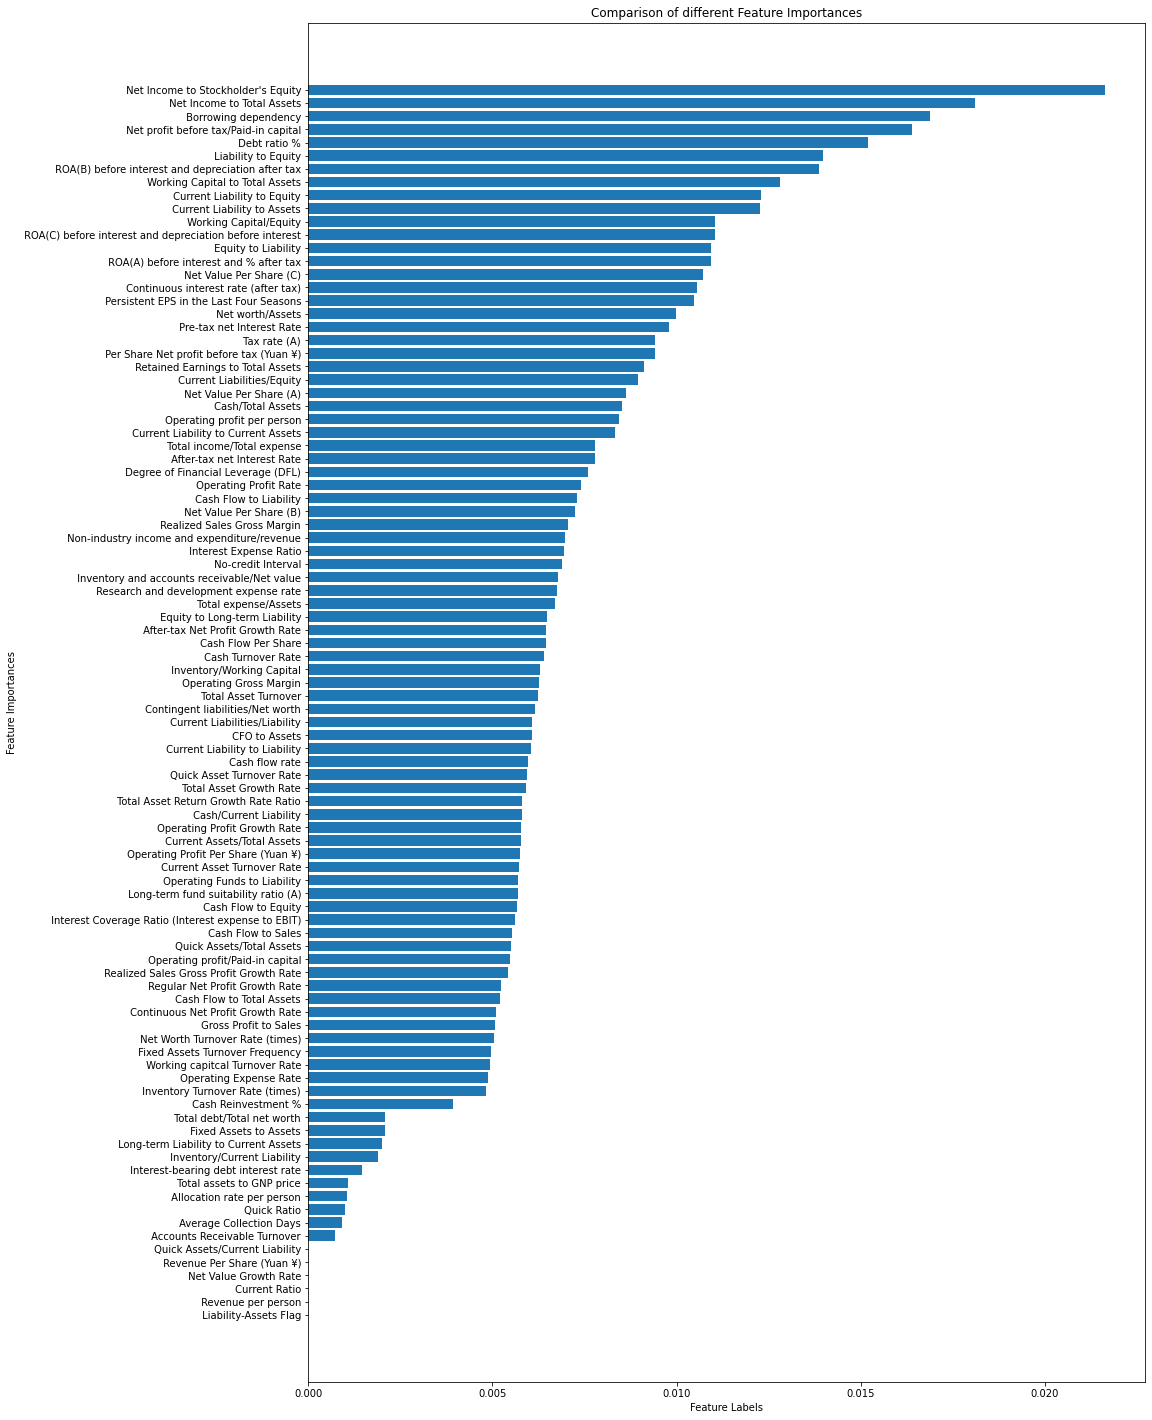

In [45]:
# Tree-based Feature importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

clf = ExtraTreesClassifier(n_estimators=50, random_state=45)
clf = clf.fit(x_pd, y)
feature_importance = clf.feature_importances_
  
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        clf.estimators_], 
                                        axis = 0) 

tbfs = pd.DataFrame(
    {"X": x_raw.columns, "FI": feature_importance_normalized}
)

tbfs = tbfs.sort_values('FI',ascending=True)


# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(15,25))
plt.barh(y=tbfs['X'],width=tbfs['FI']) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [56]:
# show the table results of predictors and feature importance
clf_df = pd.DataFrame(x_raw.columns,columns=['X'])
clf_df['feature_importance']=feature_importance_normalized
clf_df = clf_df.sort_values(by='feature_importance',ascending=False)
clf_df.head(30)

,X,feature_importance
89,Net Income to Stockholder's Equity,0.021636
85,Net Income to Total Assets,0.018102
39,Borrowing dependency,0.016874
42,Net profit before tax/Paid-in capital,0.016384
36,Debt ratio %,0.015188
90,Liability to Equity,0.013973
2,ROA(B) before interest and depreciation after...,0.013871
53,Working Capital to Total Assets,0.012818
77,Current Liability to Equity,0.012282
59,Current Liability to Assets,0.012269


In [57]:
clf_df.tail(10)

,X,feature_importance
52,Allocation rate per person,0.001052
33,Quick Ratio,0.001013
46,Average Collection Days,0.000921
45,Accounts Receivable Turnover,0.000733
84,Liability-Assets Flag,0.000000
50,Revenue per person,0.000000
32,Current Ratio,0.000000
57,Quick Assets/Current Liability,0.000000
29,Net Value Growth Rate,0.000000
20,Revenue Per Share (Yuan ¥),0.000000


### Base Model

In [59]:
# confirm the columns of x 
X_finalized = x_pd.drop(columns=[' Quick Assets/Current Liability',' Liability-Assets Flag',' Revenue per person',
                                 ' Net Value Growth Rate',' Revenue Per Share (Yuan ¥)'])

In [60]:
X_finalized.shape

(6750, 89)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_finalized, y, test_size=0.2, random_state=101)

In [ ]:
# Find some classification models and check their baseline accuracy with 10 CV folds

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def get_model():
    models = []
    models.append(('LR' , LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('GBC', GradientBoostingClassifier()))
    models.append(('RF' , RandomForestClassifier(n_estimators=100)))
    models.append(('MLP', MLPClassifier()))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    return models

def bl_performance(X_train, y_train,models):
    results = []
    names = []
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=101)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('{}: CV accuracy mean: {:.4}'.format(name, cv_results.mean()))
        
    return names, results

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

models = get_model()
names,results = bl_performance(X_train, y_train,models)